**Building a Mutiple Linear Regression Model**

$Task$: To predict taxi fares using existing data that was collected over the course of a year.

1. Importing and loading packages.

In [1]:
#For data manipulation
import os
import pandas as pd
import numpy as np

#For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For datetime conversion
import datetime as dict

#For Model Building (OLS, MLR, Confusion Matrix)
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

In [2]:
#Load the dataset
get_cwd = os.getcwd()
df0 = pd.read_csv(os.path.join(get_cwd, 'Dataset') + '/2017_Yellow_Taxi_Trip_Data.csv')
df = df0.copy()

In [3]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


2a. EDA

In [4]:
df.shape

(22699, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [6]:
#Check for null values and duplicates
df.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(22699, 18)

In [8]:
#Basic Stats
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


2b. Converting Pickup and Dropoff columns to datetime

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [10]:
#Converting date columns to datetime
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

2c. Create duration column

In [11]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds() // 60

In [12]:
df.sort_values(by='duration', ascending=False)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
15579,41838754,2,2017-05-10 18:53:53,2017-05-11 18:53:02,5,0.74,1,N,161,162,2,7.0,1.0,0.5,0.0,0.0,0.3,8.8,1439.0
924,9397494,2,2017-02-09 23:24:58,2017-02-10 23:24:31,5,4.86,1,N,249,238,1,17.5,0.5,0.5,0.0,0.0,0.3,18.8,1439.0
22638,27567057,2,2017-04-03 21:02:49,2017-04-04 21:01:28,1,1.73,1,N,107,249,2,9.0,0.5,0.5,0.0,0.0,0.3,10.3,1438.0
21366,106024452,2,2017-12-14 17:21:37,2017-12-15 17:19:53,1,3.13,1,N,236,186,2,29.5,1.0,0.5,0.0,0.0,0.3,31.3,1438.0
7939,55106408,2,2017-06-30 20:36:00,2017-07-01 20:34:28,1,1.09,1,N,48,161,2,7.0,0.5,0.5,0.0,0.0,0.3,8.3,1438.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.0,0.0,0.3,52.8,0.0
16467,37094210,2,2017-05-02 08:02:14,2017-05-02 08:02:39,1,0.11,1,N,237,237,1,2.5,0.0,0.5,0.5,0.0,0.3,3.8,0.0
22670,17852208,1,2017-03-03 23:09:16,2017-03-03 23:09:35,1,0.00,1,N,132,132,3,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
22680,39375701,1,2017-05-16 06:35:44,2017-05-16 06:35:51,1,1.30,1,N,230,230,3,2.5,0.0,0.5,0.0,0.0,0.3,3.3,0.0


In [13]:
#info to check and decide columns for outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

- trip_distance
- fare_amount
- duration

2d. Box Plots

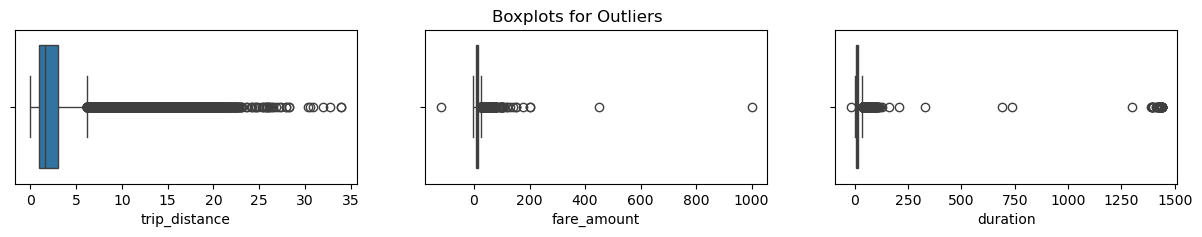

In [14]:
#Box_plots for trip_distance, fare_amount and duration
fig, axes = plt.subplots(1, 3, figsize = (15,2))
sns.boxplot(ax=axes[0], data = df, x = 'trip_distance')
sns.boxplot(ax=axes[1], data = df, x = 'fare_amount')
sns.boxplot(ax=axes[2], data = df, x = 'duration')
fig.suptitle("Boxplots for Outliers")
plt.show()

All three variables contain outliers. Some are extreme, but others not so much.

2e. Imputations

Some trip distances of 0 might be bad data or very short trips rounded down

In [15]:
sorted(set(df['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

In [16]:
#Calculate the count of rides where the trip_distance is zero.
sum(df['trip_distance'] == 0)

148

In [17]:
#fare_amount outliers
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

The range of values in the fare_amount column is large and the extremes don't make much sense.

In [18]:
#Impute values less than $0 with 0
df.loc[df['fare_amount'] < 0, 'fare_amount'] = 0
df['fare_amount'].min()

np.float64(0.0)

In [19]:
def outlier_imputer(column_list, iqr_factor):
  '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
  '''
  for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3-q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper threshold: ', upper_threshold)

        #Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()

In [20]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper threshold:  62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



In [21]:
#duration outliers
df['duration'].describe()

count    22699.000000
mean        16.526940
std         61.994905
min        -17.000000
25%          6.000000
50%         11.000000
75%         18.000000
max       1439.000000
Name: duration, dtype: float64

The duration column has problematic values at both the lower and upper extremities.

In [22]:
#Impute a 0 for any negative values
df.loc[df['duration'] < 0, 'duration'] = 0
df['duration'].min()

np.float64(0.0)

In [23]:
#Impute the high outliers
outlier_imputer(['duration'], 6)

duration
q3: 18.0
upper threshold:  90.0
count    22699.000000
mean        13.978986
std         11.979803
min          0.000000
25%          6.000000
50%         11.000000
75%         18.000000
max         90.000000
Name: duration, dtype: float64



3a. Feature Engineering

Create 'mean_distance' column, that captures the mean distance for each group of trips that share pickup and dropoff points.

In [24]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)
df['pickup_dropoff'].head(5)

0    100 231
1     186 43
2    262 236
3     188 97
4      4 112
Name: pickup_dropoff, dtype: object

Group each row by the new pickup_dropoff column, compute the mean, and capture the values only in the trip_distance column.

In [25]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped[:5]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


In [26]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict( )
# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

In [27]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID'] == 100) & (df['DOLocationID'] == 231)]['mean_distance']

0        3.521667
4909     3.521667
16636    3.521667
18134    3.521667
19761    3.521667
20581    3.521667
Name: mean_distance, dtype: float64

Create 'mean_duration' column

In [28]:
#Create mean_duration column
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID'] == 100) & (df['DOLocationID'] == 231)]['mean_duration']

0        22.333333
4909     22.333333
16636    22.333333
18134    22.333333
19761    22.333333
20581    22.333333
Name: mean_duration, dtype: float64

Create two new columns: 

'day' (name of day)

'month' (name of month) 

by extracting the relevant information from the 'tpep_pickup_datetime' column.

In [29]:
# Create 'day' col
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create 'month' col
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,2.76,0.0,0.3,16.56,14.0,100 231,3.521667,22.333333,saturday,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,4.00,0.0,0.3,20.80,26.0,186 43,3.108889,23.666667,tuesday,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,1.45,0.0,0.3,8.75,7.0,262 236,0.881429,6.771429,friday,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,6.39,0.0,0.3,27.69,30.0,188 97,3.700000,30.000000,sunday,may
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.00,0.0,0.3,17.80,16.0,4 112,4.435000,14.000000,saturday,apr
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,2.06,0.0,0.3,12.36,8.0,161 236,2.052258,11.387097,saturday,mar
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,9.86,0.0,0.3,59.16,59.0,79 241,12.830000,59.000000,wednesday,may
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,1.78,0.0,0.3,19.58,21.0,237 114,4.022500,25.750000,tuesday,aug
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,...,0.00,0.0,0.3,9.80,12.0,234 249,1.019259,7.333333,saturday,feb
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,...,2.75,0.0,0.3,16.55,20.0,239 237,1.580000,10.066667,friday,nov


Create 'rush_hour' column
Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary rush_hour column that contains a 1 if the ride was during rush hour and a 0 if it was not.


In [30]:
# Create 'rush_hour' col
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour
# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [31]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else: 
        val = 0
    return val

In [32]:
# Apply the `rush_hourizer()` function to the new column
df.loc[(df['day'] != 'saturday') & (df['day'] != 'sunday'), 'rush_hour'] = df.apply(rush_hourizer, axis = 1)
df.head()

C:\Users\222817\AppData\Local\Temp\ipykernel_3740\155305120.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0 1 1 ... 1 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[(df['day'] != 'saturday') & (df['day'] != 'sunday'), 'rush_hour'] = df.apply(rush_hourizer, axis = 1)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.0,100 231,3.521667,22.333333,saturday,mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.0,186 43,3.108889,23.666667,tuesday,apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.0,262 236,0.881429,6.771429,friday,dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.0,188 97,3.700000,30.000000,sunday,may,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.0,4 112,4.435000,14.000000,saturday,apr,0


4. Scatter Plots

(0.0, 70.0)

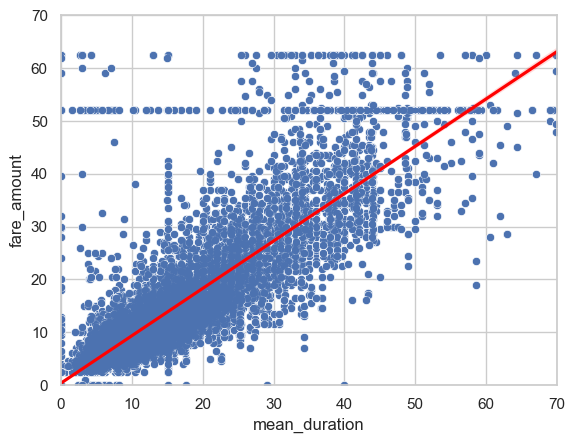

In [33]:
# Create a scatterplot to visualize the relationship between variables of interest
### YOUR CODE HERE ###
sns.set(style='whitegrid')
sns.scatterplot(data=df, x = 'mean_duration', y = 'fare_amount')
sns.regplot(x=df['mean_duration'], y=df['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)

In [34]:
#Check the value of the rides in the second horizontal line in the scatter plot.
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

fare_amount
52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: count, dtype: int64

In [35]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

In [36]:
# Examine the first 30 of these trips.
df[df['fare_amount'] == 52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.0,236 132,19.211667,40.333333,sunday,mar,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.0,132 163,19.229000,52.400000,saturday,jun,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.0,132 132,2.255862,2.689655,saturday,nov,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.0,132 79,19.431667,46.666667,wednesday,dec,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.0,132 234,17.654000,49.200000,sunday,sep,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.0,132 48,18.761905,57.714286,tuesday,feb,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.0,228 88,4.730000,15.000000,monday,jun,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.0,132 48,18.761905,57.714286,thursday,aug,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.0,186 132,17.096000,42.200000,tuesday,sep,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.0,132 148,17.994286,45.857143,sunday,apr,0


It seems that almost all of the trips in the first 30 rows where the fare amount was \$52 either begin or end at location 132, and all of them have a `RatecodeID` of 2.

The data dictionary says that `RatecodeID` of 2 indicates trips for JFK, which is John F. Kennedy International Airport. A quick Google search for "new york city taxi flat rate \$52" indicates that in 2017 (the year that this data was collected) there was indeed a flat fare for taxi trips between JFK airport (in Queens) and Manhattan.

Because `RatecodeID` is known from the data dictionary, the values for this rate code can be imputed back into the data after the model makes its predictions. This way you know that those data points will always be correct.

5. Isolate the modelling variables

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [38]:
print(df.columns)

df2 = df.copy()

df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis = 1)

df2.info()

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'duration',
       'pickup_dropoff', 'mean_distance', 'mean_duration', 'day', 'month',
       'rush_hour'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


6. Pair plot

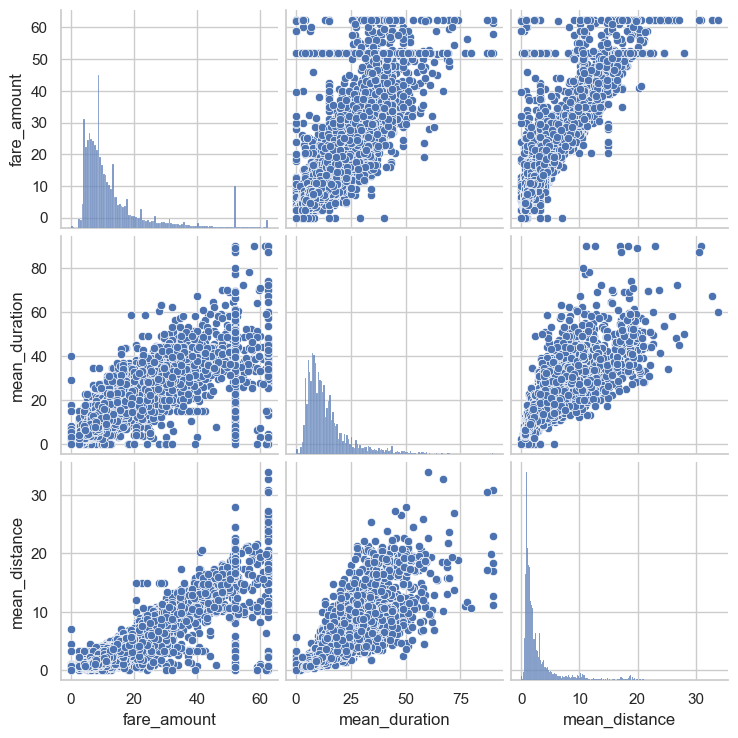

In [39]:
# Create a pairplot to visualize pairwise relationships between variables in the data

sns.pairplot(data = df2[['fare_amount', 'mean_duration', 'mean_distance']])

These variables all show linear correlation with each other.

7. Identify Correlations

In [40]:
# Correlation matrix to help determine most correlated variables
df2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001702,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015794,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.858797,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874374,-0.039725
mean_duration,0.001702,0.015794,0.858797,0.874374,1.000000,-0.021508
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.021508,1.000000


<Axes: >

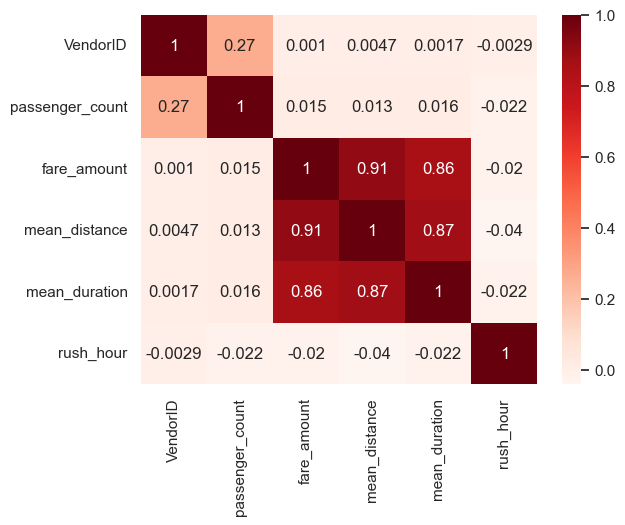

In [41]:
# Create correlation heatmap
sns.heatmap(df2.corr(method='pearson'), annot = True, cmap = 'Reds')

`mean_duration` and `mean_distance` are both highly correlated with the target variable of `fare_amount` They're also both correlated with each other, with a Pearson correlation of 0.87.

This model will predict `fare_amount`, which will be used as a predictor variable in machine learning models. Therefore we will try modelling with both variables even though they are correlated

8a. Split the data into outcome variabe and features.

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


In [43]:
# Remove the target column from the features
X = df2.drop(columns='fare_amount')

In [44]:
# Set y variable
y = df2[['fare_amount']]

In [45]:
# Display first few rows
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.333333,0
1,1,1,3.108889,23.666667,0
2,1,1,0.881429,6.771429,1
3,2,1,3.700000,30.000000,0
4,2,1,4.435000,14.000000,0


8b. Preprocess Data

In [46]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)

In [47]:
# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.333333,0,True
1,1,3.108889,23.666667,0,False
2,1,0.881429,6.771429,1,False
3,1,3.700000,30.000000,0,True
4,1,4.435000,14.000000,0,True


Split data into training and test sets

In [48]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Standardize the data

In [49]:
# Standardize the X variables
scalar = StandardScaler().fit(X_train)
X_train_scaled = scalar.transform(X_train)
X_train_scaled

array([[-0.50301524,  0.8694684 ,  0.20216082, -0.64893329,  0.89286563],
       [-0.50301524, -0.60011281, -0.69621357,  1.54099045,  0.89286563],
       [ 0.27331093, -0.47829156, -0.55374529, -0.64893329, -1.11998936],
       ...,
       [-0.50301524, -0.45121122, -0.68276615, -0.64893329, -1.11998936],
       [-0.50301524, -0.58944763, -0.85487143,  1.54099045, -1.11998936],
       [ 1.82596329,  0.83673851,  1.12196432, -0.64893329,  0.89286563]])

Fit the model

In [50]:
# Fit your model to the training data
lr = LinearRegression().fit(X_train_scaled, y_train)
lr

LinearRegression()

8c. Evaluate the model

In [51]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print("Coefficient of determination: ", r_sq)
y_pred_train = lr.predict(X_train_scaled)
print("R^2: ", metrics.r2_score(y_train, y_pred_train))
print("MAE: ", metrics.mean_absolute_error(y_train, y_pred_train))
print("MSE: ", metrics.mean_squared_error(y_train, y_pred_train))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

Coefficient of determination:  0.8398732490985744
R^2:  0.8398732490985744
MAE:  2.1878333922212914
MSE:  17.886405308135963
RMSE:  4.229232236249975


In [52]:
# Scale the X_test data
X_test_scaled = scalar.transform(X_test)
X_test_scaled

array([[-0.50301524, -0.01228033, -0.09454999, -0.64893329,  0.89286563],
       [-0.50301524,  0.1705781 ,  0.8285503 , -0.64893329,  0.89286563],
       [ 0.27331093, -0.56800902, -0.71057814, -0.64893329,  0.89286563],
       ...,
       [-0.50301524, -0.5294519 , -0.65500374, -0.64893329,  0.89286563],
       [-0.50301524, -0.53660633, -0.83892974, -0.64893329, -1.11998936],
       [-0.50301524, -0.29519336, -0.17696966,  1.54099045,  0.89286563]])

In [ ]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print("Coefficient of determination: ", r_sq)
y_pred_test = lr.predict(X_test_scaled)
print("R^2: ", metrics.r2_score(y_test, y_pred_test))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred_test))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred_test))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Coefficient of determination:  0.8398732490985744
R^2:  0.8681973129153191
MAE:  2.1357802626308526
MSE:  14.33309327403068
RMSE:  3.7859071930028447


9a. Results

In [54]:
# Create a `results` dataframe
results = pd.DataFrame(data = {'actual':y_test['fare_amount'],
                               'predicted':y_pred_test.ravel()})
results['residuals'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residuals
5818,14.0,12.403656,1.596344
18134,28.0,16.302445,11.697555
4655,5.5,6.730067,-1.230067
7378,15.5,16.238228,-0.738228
13914,9.5,10.504309,-1.004309


9b. Visualize model results

Text(0.5, 1.0, 'Actual v/s Predicted')

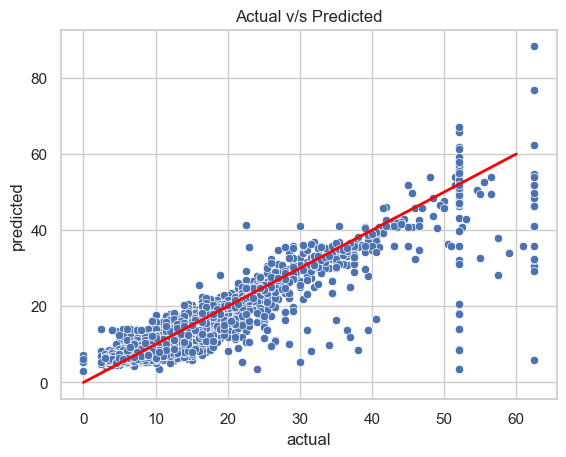

In [55]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(data = results, x = 'actual', y = 'predicted')
plt.plot([0, 60], [0, 60], c = 'red', linewidth = 2)
plt.title("Actual v/s Predicted")

<Axes: xlabel='residuals', ylabel='Count'>

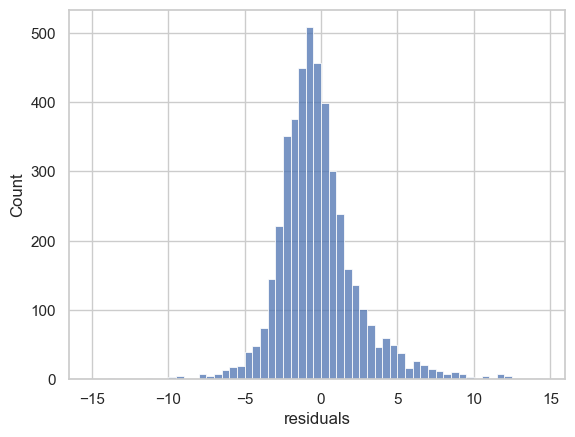

In [56]:
# Visualize the distribution of the `residuals`
sns.histplot(data = results, x = 'residuals', bins = np.arange(-15,15,0.5))

In [57]:
# Calculate residual mean
results['residuals'].mean()

np.float64(-0.015196915065259504)

Text(0.5, 1.0, 'Residuals over Predicted Values')

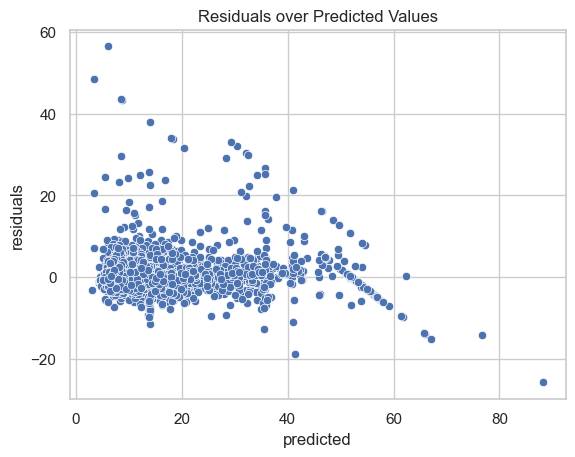

In [58]:
# Create a scatterplot of `residuals` over `predicted`
### YOUR CODE HERE ###
sns.scatterplot(data = results, x = 'predicted', y = 'residuals')
plt.title("Residuals over Predicted Values")

9c. Coeffifients

In [59]:
# Output the model's coefficients
coefficients = pd.DataFrame(lr.coef_, columns = X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.030495,7.137253,2.809751,0.110183,-0.053693


In [60]:
# 1. Calculate SD of `mean_distance` in X_train data
print(X_train['mean_distance'].std())

# 2. Divide the model coefficient by the standard deviation
print(7.133867 / X_train['mean_distance'].std())

3.574812975256436
1.9955916713344308


**Conclusion**

Now you can make a more intuitive interpretation: for every 3.57 miles traveled, the fare increased by a mean of \$7.13. Or, reduced: for every 1 mile traveled, the fare increased by a mean of \$2.00.